<a href="https://colab.research.google.com/github/shauryam-daksham/CodeClauseInternship_CreditCardFraudDetection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [ ]:
df.isnull().values.any()

True

In [ ]:
# Option 1: Drop rows with any missing values (default behavior)
df_cleaned = df.dropna()
df.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df['Class'].value_counts()

Class
0.0    9926
1.0      38
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

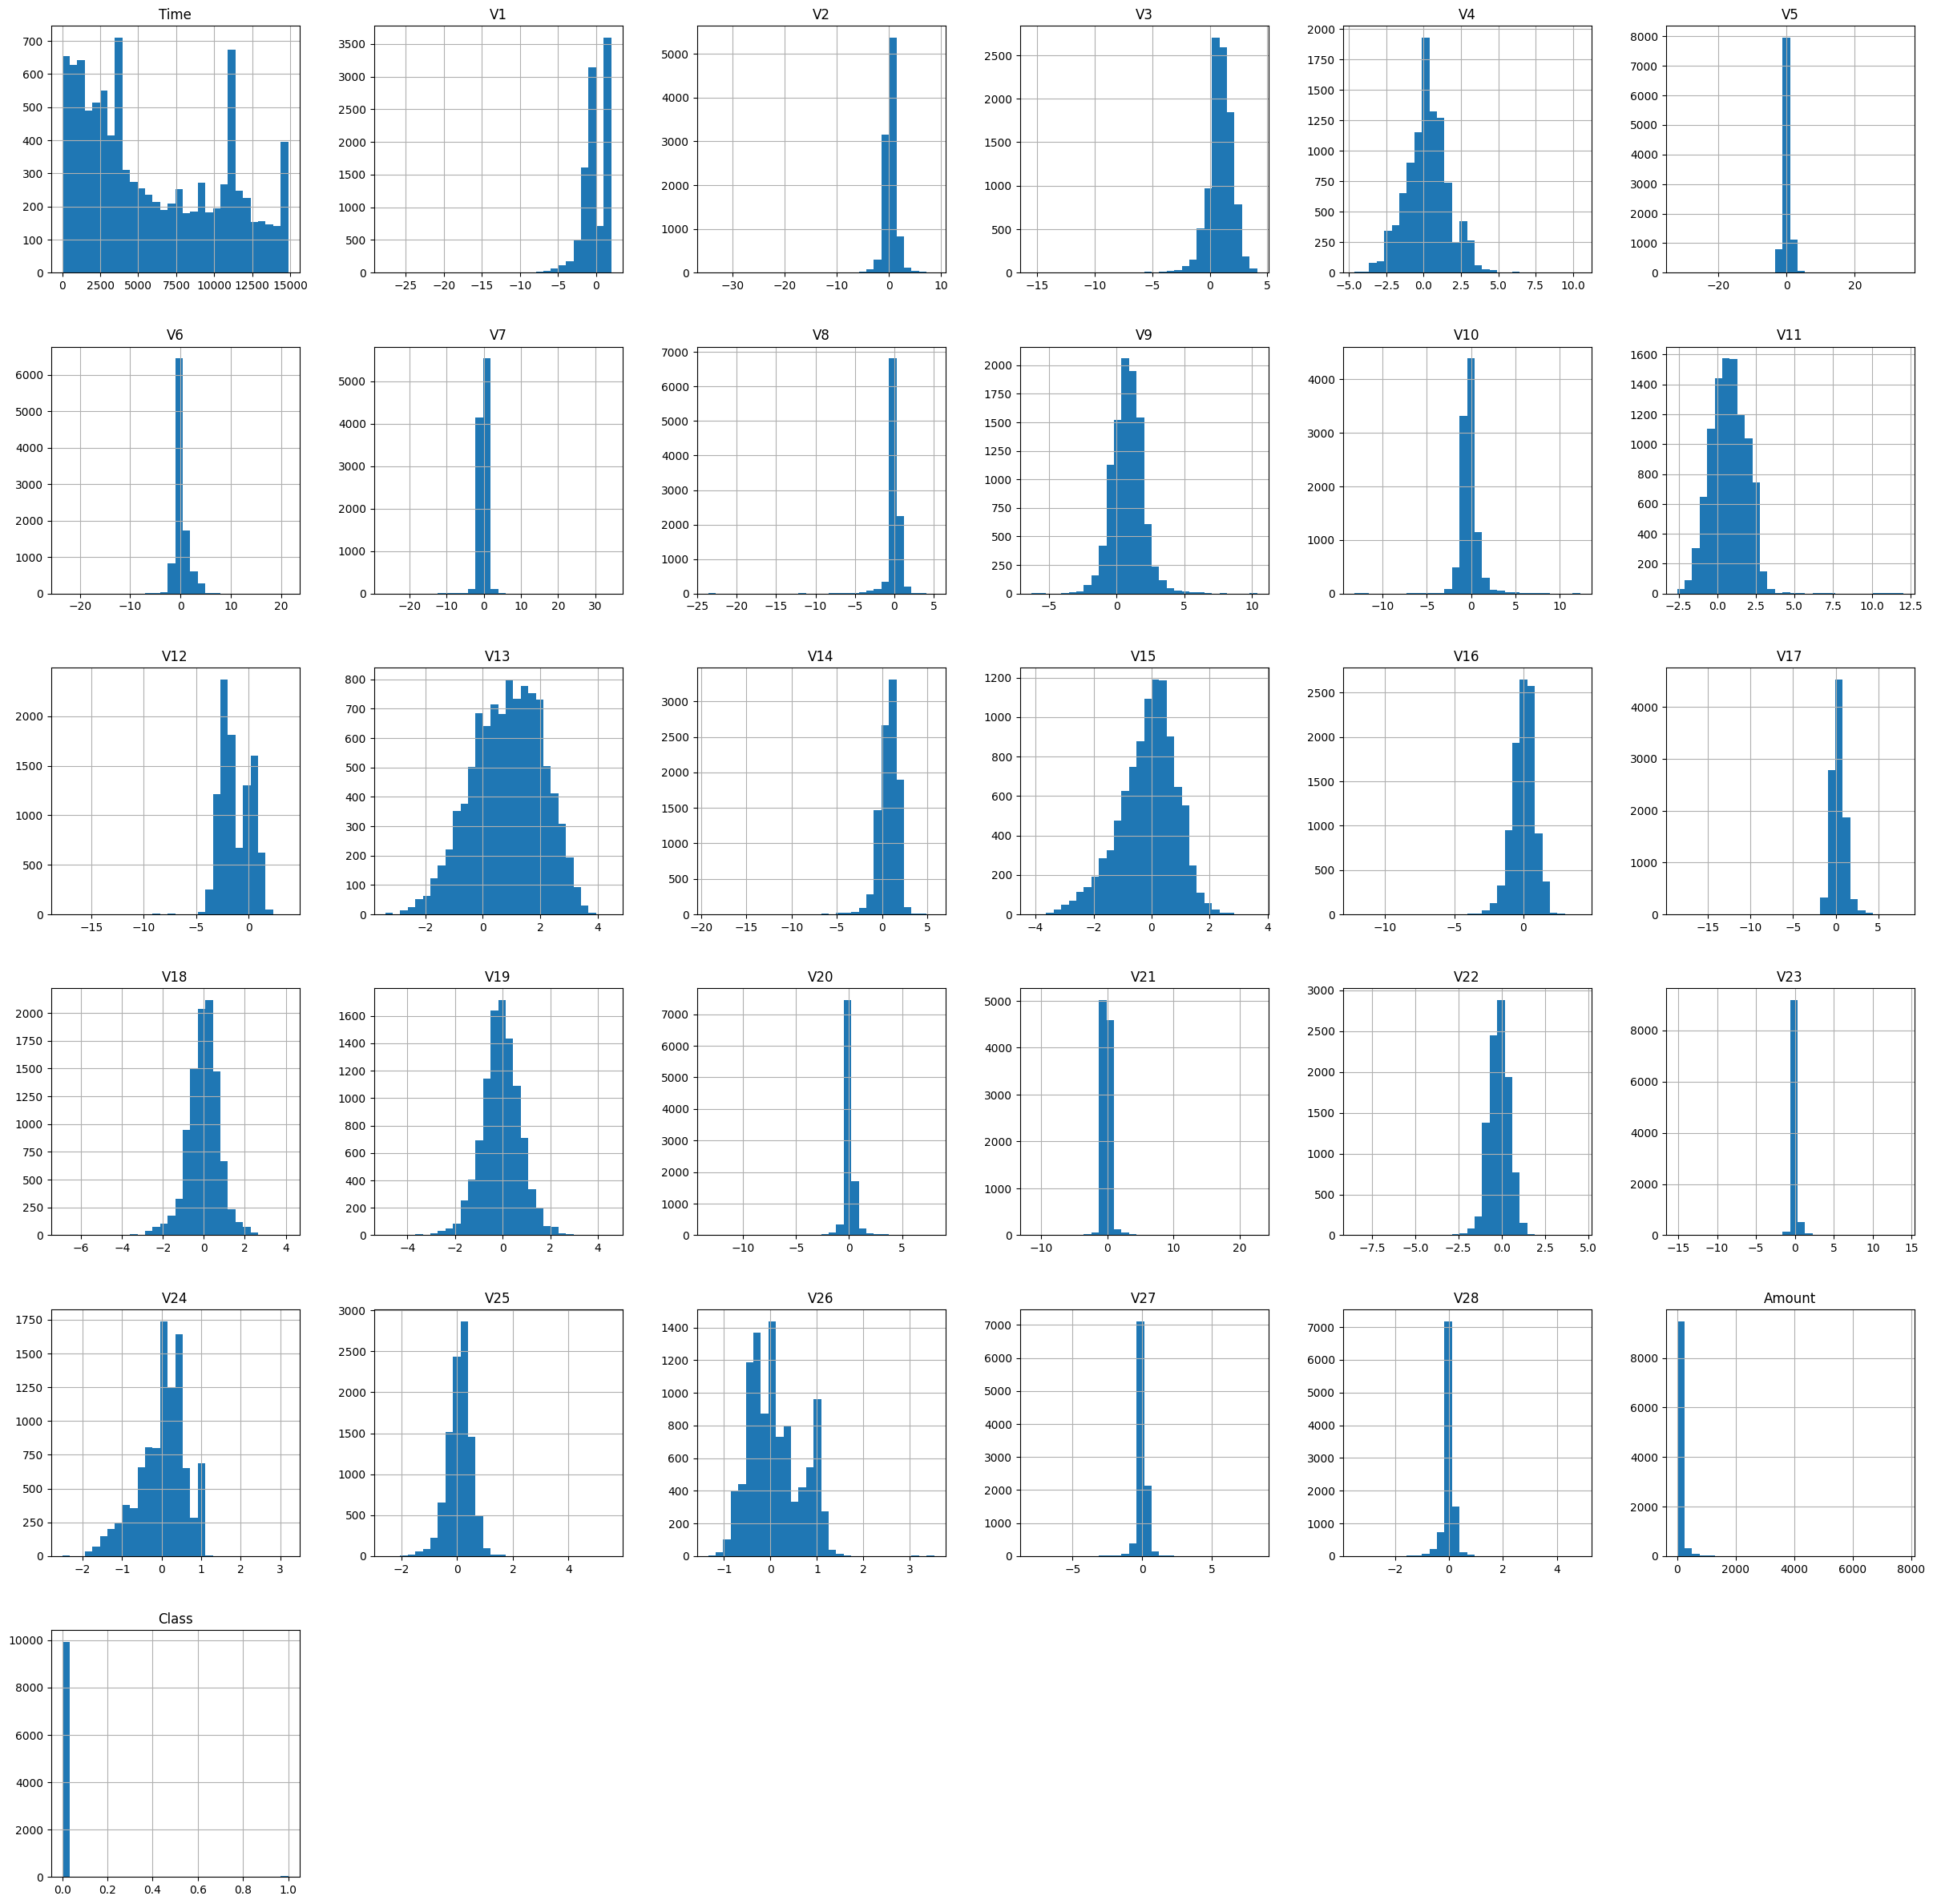

In [ ]:
df.hist(bins=30, figsize=(30,30))

In [ ]:
print(df.shape)

(9965, 31)


In [ ]:
df.Amount.describe()

count    9964.000000
mean       62.968359
std       184.626707
min         0.000000
25%         5.000000
50%        15.950000
75%        50.792500
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
# Impute missing values with mean (axis=0 for columns)
df_imputed = df.fillna(df.mean(axis=0))

df_imputed.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.333837,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.469358,0.0
1,-1.333837,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.326504,0.0
2,-1.333612,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.709977,0.0
3,-1.333612,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.327876,0.0
4,-1.333387,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.038033,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the Amount column
df_imputed['Amount'] = StandardScaler().fit_transform(df_imputed['Amount'].values.reshape(-1, 1))

# Scale the Time column
df_imputed['Time'] = StandardScaler().fit_transform(df_imputed['Time'].values.reshape(-1, 1))

# Check the first few rows of the dataset after scaling
df_imputed.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.333837,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.469381,0.0
1,-1.333837,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.326521,0.0
2,-1.333612,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.710063,0.0
3,-1.333612,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.327893,0.0
4,-1.333387,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.038035,0.0


In [ ]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest object
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01),
 max_features=1.0, random_state=42)

# Fit the data and tag the outliers
clf.fit(df_imputed)

# Get the predictions
y_pred = clf.predict(df_imputed)

# Reshape the predictions to a 1D array
y_pred = y_pred.reshape(-1,1)

# Print the number of outliers
print("Number of outliers:", len(df[y_pred == -1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers: 100


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Create the LOF object
clf = LocalOutlierFactor(n_neighbors=20, contamination=float(0.01))

# Fit the data and tag the outliers
y_pred = clf.fit_predict(df_imputed)

# Reshape the predictions to a 1D array
y_pred = y_pred.reshape(-1,1)

# Print the number of outliers
print("Number of outliers:", len(df[y_pred == -1]))

Number of outliers: 100


In [ ]:
from sklearn.svm import OneClassSVM

# Create the One-class SVM object
clf = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.01)

# Fit the data and tag the outliers
clf.fit(df_imputed)

# Get the predictions
y_pred = clf.predict(df_imputed)

# Reshape the predictions to a 1D array
y_pred = y_pred.reshape(-1,1)

# Print the number of outliers
print("Number of outliers:", len(df[y_pred == -1]))


Number of outliers: 100


In [ ]:
from sklearn.model_selection import train_test_split


# Define X and y
X = df_imputed.drop('Class', axis=1)
y = df_imputed['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Ensure y_train and y_test are binary
y_train = y_train.astype(int)  # Convert to integer if necessary
y_test = y_test.astype(int)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Create a list of classifiers to evaluate
classifiers = [LogisticRegression(), DecisionTreeClassifier()]



# Create parameter grids for each classifier
lr_params = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7]}
rf_params = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7]}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
param_grids = [lr_params, dt_params, rf_params, knn_params]

# Loop over classifiers and parameter grids to find the best model
for i, classifier in enumerate(classifiers):
    clf = GridSearchCV(classifier, param_grids[i], cv=5)
    clf.fit(X_train, y_train)
    print(classifier.__class__.__name__)
    print(clf.best_params_)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

LogisticRegression
{'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2976
           1       1.00      0.86      0.92        14

    accuracy                           1.00      2990
   macro avg       1.00      0.93      0.96      2990
weighted avg       1.00      1.00      1.00      2990

DecisionTreeClassifier
{'criterion': 'gini', 'max_depth': 5}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2976
           1       1.00      0.86      0.92        14

    accuracy                           1.00      2990
   macro avg       1.00      0.93      0.96      2990
weighted avg       1.00      1.00      1.00      2990



In [ ]:
# make predictions on the test set
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# print the classification metrics
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

Accuracy: 0.9993311036789297
Precision: 1.0
Recall: 0.8571428571428571
F1 Score: 0.923076923076923
